# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [6]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [7]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

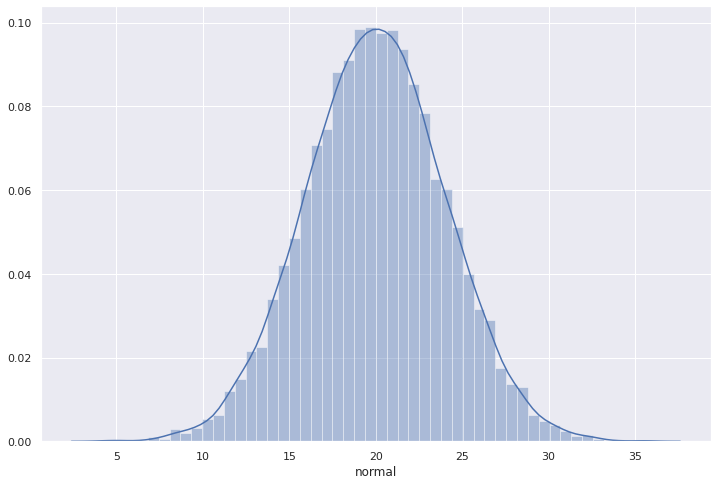

In [39]:
# Sua análise da parte 1 começa aqui.
sns.distplot(dataframe['normal'])


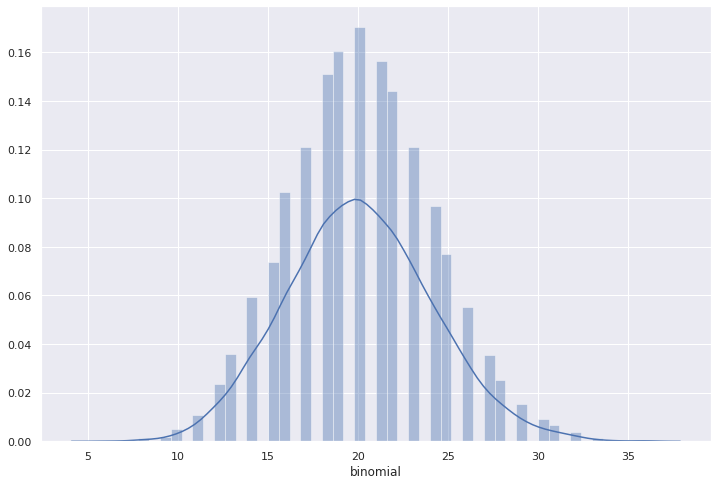

In [8]:
sns.distplot(dataframe['binomial'])

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [217]:
def q1():
    # Retorne aqui o resultado da questão 1.
    normal = dataframe['normal'].quantile([0.25, 0.5, 0.75]).to_list()
    binom = dataframe['binomial'].quantile([0.25, 0.5, 0.75]).to_list()

    result = [round((i - j), 3) for i, j in zip(normal, binom)]
    
    return tuple(result)

q1()

(0.31, -0.01, -0.316)

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [10]:
def q2():
    # Retorne aqui o resultado da questão 2.
    mean = dataframe['normal'].mean()
    std = dataframe['normal'].std()
    ecdf = ECDF(dataframe['normal'])
    
    result = ecdf(mean + std) - ecdf(mean - std)
    return float(round(result, 3))

q2()

0.684

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [233]:
def q3():
    # Retorne aqui o resultado da questão 3.
    m_norm = dataframe['normal'].mean()
    v_norm = dataframe['normal'].var()
    m_binom = dataframe['binomial'].mean()
    v_binom = dataframe['binomial'].var()
    result = (round(m_binom - m_norm, 3), round(v_binom - v_norm, 3))
    return result

q3()

(0.106, 0.22)

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [12]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [13]:
# Sua análise da parte 2 começa aqui.
stars.head()

mean_profile  sd_profile  kurt_profile  skew_profile  mean_curve  \
0    102.507812   58.882430      0.465318     -0.515088    1.677258   
1    103.015625   39.341649      0.323328      1.051164    3.121237   
2    136.750000   57.178449     -0.068415     -0.636238    3.642977   
3     88.726562   40.672225      0.600866      1.123492    1.178930   
4     93.570312   46.698114      0.531905      0.416721    1.636288   

    sd_curve  kurt_curve  skew_curve  target  
0  14.860146   10.576487  127.393580   False  
1  21.744669    7.735822   63.171909   False  
2  20.959280    6.896499   53.593661   False  
3  11.468720   14.269573  252.567306   False  
4  14.545074   10.621748  131.394004   False

In [138]:
stars.shape

(17897, 9)

In [140]:
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mean_profile  17897 non-null  float64
 1   sd_profile    17897 non-null  float64
 2   kurt_profile  17897 non-null  float64
 3   skew_profile  17897 non-null  float64
 4   mean_curve    17897 non-null  float64
 5   sd_curve      17897 non-null  float64
 6   kurt_curve    17897 non-null  float64
 7   skew_curve    17897 non-null  float64
 8   target        17897 non-null  bool   
dtypes: bool(1), float64(8)
memory usage: 1.1 MB


## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [14]:
def q4():
    # Retorne aqui o resultado da questão 4.
    pulsar_mean = stars.query('target == False')['mean_profile']
    false_pulsar_mean_profile_standardized = (pulsar_mean - pulsar_mean.mean()) / pulsar_mean.std()
    
    ppf80 = sct.norm.ppf(0.80, 0, 1)
    ppf90 = sct.norm.ppf(0.90, 0, 1)
    ppf95 = sct.norm.ppf(0.95, 0, 1)
    
    ecdf = ECDF(false_pulsar_mean_profile_standardized)

    return (ecdf(ppf80).round(3), ecdf(ppf90).round(3), ecdf(ppf95).round(3))

q4()

(0.806, 0.911, 0.959)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [278]:
def q5():
    # Retorne aqui o resultado da questão 5.
    pulsar_mean = stars.query('target == False')['mean_profile']
    false_pulsar_mean_profile_standardized = (pulsar_mean - pulsar_mean.mean()) / pulsar_mean.std()
    pulsar_quantiles = false_pulsar_mean_profile_standardized.quantile((0.25,0.5,0.75))
    
    ppf25 = sct.norm.ppf(0.25, 0, 1)
    ppf50 = sct.norm.ppf(0.50, 0, 1)
    ppf75 = sct.norm.ppf(0.75, 0, 1)
    
    result = pulsar_quantiles - (ppf25, ppf50, ppf75)
    
    return tuple(round(result, 3))

q5()

(0.027, 0.04, -0.004)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.